In [1]:
import os
import re
import sys
import sklearn as skl
import math

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sklearn.cluster

import glob

from data_grid import DataGrid

from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn.cluster import MiniBatchKMeans

from data_grid_TiNiSn import DataGrid, DataGrid_TiNiSn_500C, DataGrid_TiNiSn_600C

from Agglo_cluster import Agglo_cluster

from peak_removal import peak_rem

import dataproc.operations

from dataproc.operations.hitp import bayesian_block_finder
from dataproc.operations.peakShapes import voigtFn

# Agglomerative Clustering on the (177,800) dataset using diffferent metrics

## The first reduces the dimension of the dataset with PCA
## The second uses the full 800 features

In [2]:
#Load the dataset

dataGrid = DataGrid_TiNiSn_500C()
dataGrid2 = DataGrid_TiNiSn_600C()

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_600C-20200714T191809Z-001/TiNiSn_600C/
Data Loaded Succesfully


In [3]:
np.shape(dataGrid.get_data_array())

(177, 800)


(177, 800)

In [4]:
Agglo_cluster?

## Cosine metric

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


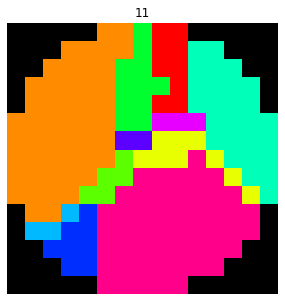

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


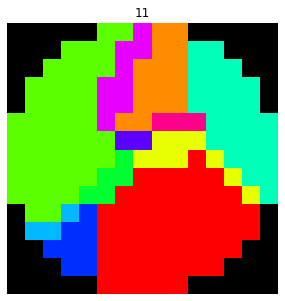

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


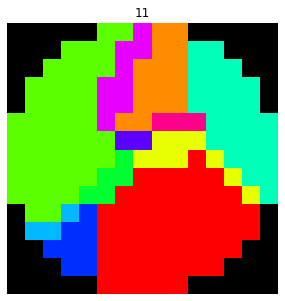

In [5]:
# Reduce the 800 faetures to 25,50,100, etc and perform agglomerative clustering with Cosine metric
for i in [25,50,100]:
    pca = PCA(n_components=i)
    X_red = pca.fit_transform(dataGrid.get_data_array())
    D_PCA = Agglo_cluster(X_red,deal = 'None',metric = 'cosine')

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


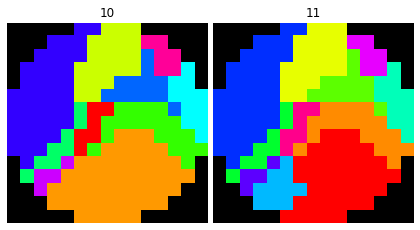

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 3, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 3, 7, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 6, 6, 6, 3, 3, 9, 2, 0, 0, 0, 0, 0, 2, 2, 2,
        6, 6, 6, 6, 3, 9, 9, 2, 0, 0, 0, 2, 2, 2, 4, 6, 6, 6, 6, 6, 3, 9,
        2, 2, 2, 2, 2, 2, 4, 4, 6, 6, 6, 6, 6, 3, 9, 9, 2, 2, 2, 2, 5, 4,
        4, 6, 6, 6, 6, 6, 1, 1, 5, 5, 5, 5, 5, 4, 4, 4, 6, 6, 6, 6, 1, 1,
        1, 5, 5, 5, 5, 4, 4, 6, 6, 6, 6, 1, 1, 1, 1, 1, 5, 8, 8, 4, 6, 6,
        6, 6, 1, 1, 1, 1, 5, 8, 8, 6, 6, 6, 1, 1, 1, 1, 8, 8, 6, 6, 1, 1,
        1], dtype=int64),
 array([10, 10, 10, 10, 10,  5,  5,  5, 10, 10, 10, 10, 10, 10,  7,  5,  5,
         5,  5, 10, 10, 10, 10, 10, 10,  3,  7,  7,  5,  5, 10, 10, 10, 10,
        10, 10, 10, 10,  6,  3,  3,  7,  5, 10, 10, 10, 10, 10, 10, 10,  0,
         6,  6,  6,  3,  3,  9,  0, 10, 10, 10, 10, 10,  0,  0,  0,  6,  6,
         6,  6,  3,  9,  9,  0, 10, 10, 10,  0,  0,  0,  4,  6,  6,  6,  6,
  

In [6]:
Agglo_cluster(dataGrid.get_data_array(), a = 10, b=12, deal = 'None', metric = 'cosine')

## Average difference metric

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


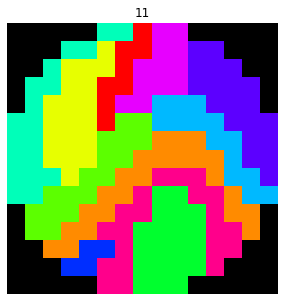

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


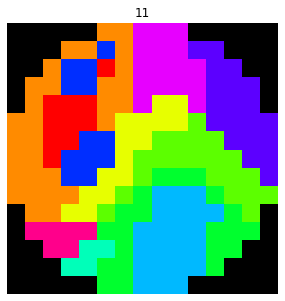

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


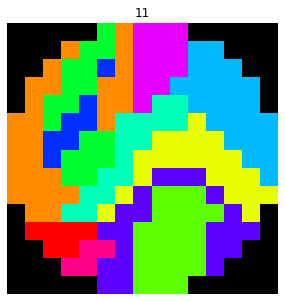

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


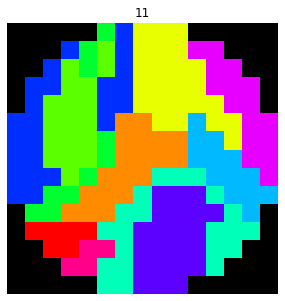

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


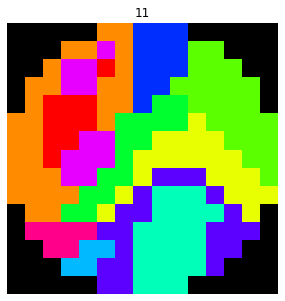

In [7]:
# Reduce the 800 faetures to 25,50,100, etc and perform agglomerative clustering with ave diff metric
for i in [25,50,100,125,150]:
    pca = PCA(n_components=i)
    X_red = pca.fit_transform(dataGrid.get_data_array())
    D_PCA = Agglo_cluster(X_red)

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


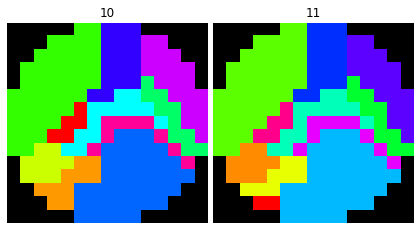

[array([5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 5,
        5, 5, 5, 1, 1, 1, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 0, 0,
        5, 5, 5, 5, 5, 5, 8, 2, 2, 1, 1, 4, 4, 8, 5, 5, 5, 5, 5, 8, 3, 3,
        2, 2, 2, 9, 9, 4, 4, 8, 5, 5, 5, 8, 3, 3, 7, 2, 2, 2, 2, 9, 9, 4,
        8, 8, 8, 8, 4, 3, 7, 7, 2, 2, 2, 2, 2, 9, 4, 4, 4, 4, 4, 3, 3, 7,
        7, 2, 2, 2, 2, 2, 2, 6, 6, 4, 4, 3, 3, 7, 7, 7, 2, 2, 2, 2, 2, 2,
        6, 6, 6, 3, 7, 7, 7, 2, 2, 2, 2, 2, 2, 6, 6, 6, 7, 7, 7, 7, 2, 2,
        2, 2, 2, 6, 6, 6, 7, 7, 7, 2, 2, 2, 2, 6, 6, 6, 7, 7, 2, 2, 6, 6,
        6], dtype=int64),
 array([ 5,  5,  5,  5,  5, 10, 10,  5,  5,  5,  5,  5,  5,  5,  1,  1,  1,
         5,  5,  5,  5,  5,  5,  5,  5,  0,  0,  0,  1,  1,  1,  5,  5,  5,
         5,  5,  5,  5,  0,  0,  0,  0,  1,  1,  5,  5,  5,  5,  5,  5,  8,
         2,  2,  0,  0,  4,  4,  8,  5,  5,  5,  5,  5,  8,  3,  3,  2,  2,
         2,  9,  9,  4,  4,  8,  5,  5,  5,  8,  3,  3,  7,  2,  2,  2,  2,
  

In [8]:
Agglo_cluster(dataGrid.get_data_array(), a=10, b=12)

## Squared Euclidean 

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


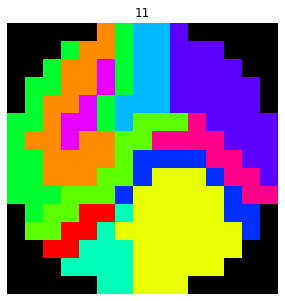

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


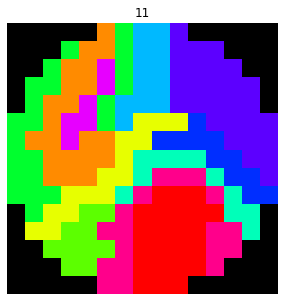

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


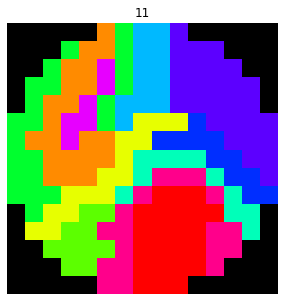

In [9]:
for i in [25,50,100]:
    pca = PCA(n_components=i)
    X_red = pca.fit_transform(dataGrid.get_data_array())
    D_PCA = Agglo_cluster(X_red, deal = 'None', metric = 'sEuclidean')

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


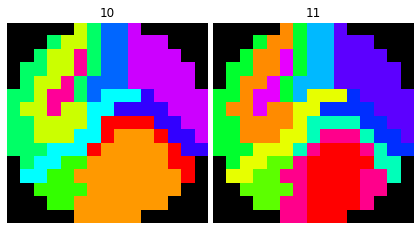

[array([0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 9, 3, 4, 4, 2, 2, 0,
        0, 0, 0, 0, 0, 9, 9, 3, 3, 3, 4, 4, 4, 9, 0, 0, 0, 0, 0, 9, 6, 6,
        3, 3, 1, 1, 1, 4, 4, 9, 0, 0, 0, 9, 6, 6, 7, 3, 3, 1, 1, 1, 1, 4,
        9, 9, 9, 9, 6, 6, 7, 7, 3, 1, 1, 8, 1, 1, 4, 4, 6, 6, 6, 6, 7, 7,
        7, 3, 3, 1, 8, 8, 3, 5, 4, 4, 4, 6, 7, 7, 7, 7, 3, 1, 1, 8, 3, 5,
        5, 5, 7, 7, 7, 7, 7, 3, 3, 1, 1, 8, 3, 5, 5, 7, 7, 7, 7, 7, 3, 1,
        1, 8, 3, 5, 5, 7, 7, 7, 7, 3, 1, 1, 3, 5, 5, 7, 7, 7, 1, 3, 5, 5,
        7], dtype=int64),
 array([ 9,  9, 10, 10, 10,  2,  2,  9,  9, 10, 10, 10, 10,  9,  2,  2,  2,
         2,  9, 10, 10, 10, 10,  9,  9,  1,  1,  2,  2,  9,  9, 10, 10, 10,
        10,  9,  9,  4,  3,  1,  1,  2,  2,  9, 10, 10, 10, 10, 10,  4,  4,
         3,  3,  3,  1,  1,  1,  4,  9, 10, 10, 10,  9,  4,  6,  6,  3,  3,
         0,  0,  0,  1,  1,  4,  9,  9,  9,  4,  6,  6,  7,  3,  3,  0,  0,
  

In [10]:
Agglo_cluster(dataGrid.get_data_array(),a=10, b=12, metric = 'sEuclidean')

## Euclidean

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


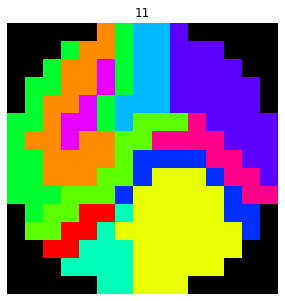

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


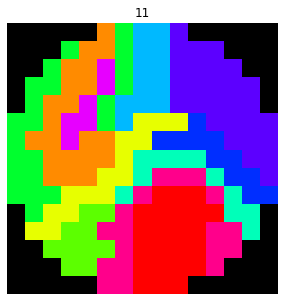

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


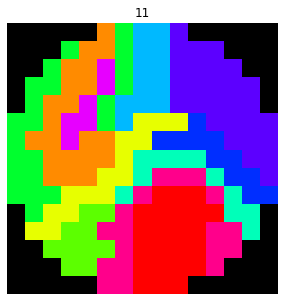

In [11]:
for i in [25,50,100]:
    pca = PCA(n_components=i)
    X_red = pca.fit_transform(dataGrid.get_data_array())
    D_PCA = Agglo_cluster(X_red,metric = 'Euclidean')

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


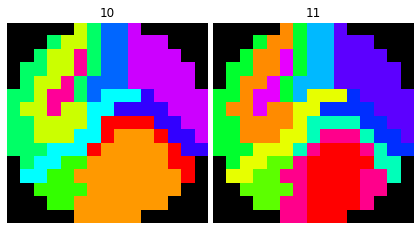

[array([0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 9, 3, 4, 4, 2, 2, 0,
        0, 0, 0, 0, 0, 9, 9, 3, 3, 3, 4, 4, 4, 9, 0, 0, 0, 0, 0, 9, 6, 6,
        3, 3, 1, 1, 1, 4, 4, 9, 0, 0, 0, 9, 6, 6, 7, 3, 3, 1, 1, 1, 1, 4,
        9, 9, 9, 9, 6, 6, 7, 7, 3, 1, 1, 8, 1, 1, 4, 4, 6, 6, 6, 6, 7, 7,
        7, 3, 3, 1, 8, 8, 3, 5, 4, 4, 4, 6, 7, 7, 7, 7, 3, 1, 1, 8, 3, 5,
        5, 5, 7, 7, 7, 7, 7, 3, 3, 1, 1, 8, 3, 5, 5, 7, 7, 7, 7, 7, 3, 1,
        1, 8, 3, 5, 5, 7, 7, 7, 7, 3, 1, 1, 3, 5, 5, 7, 7, 7, 1, 3, 5, 5,
        7], dtype=int64),
 array([ 9,  9, 10, 10, 10,  2,  2,  9,  9, 10, 10, 10, 10,  9,  2,  2,  2,
         2,  9, 10, 10, 10, 10,  9,  9,  1,  1,  2,  2,  9,  9, 10, 10, 10,
        10,  9,  9,  4,  3,  1,  1,  2,  2,  9, 10, 10, 10, 10, 10,  4,  4,
         3,  3,  3,  1,  1,  1,  4,  9, 10, 10, 10,  9,  4,  6,  6,  3,  3,
         0,  0,  0,  1,  1,  4,  9,  9,  9,  4,  6,  6,  7,  3,  3,  0,  0,
  

In [12]:
Agglo_cluster(dataGrid.get_data_array(),a=10, b=12, metric = 'Euclidean')

## Manhattan

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


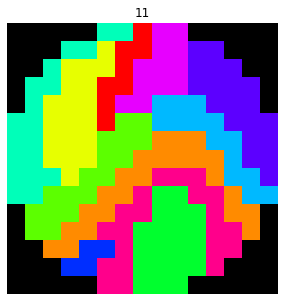

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


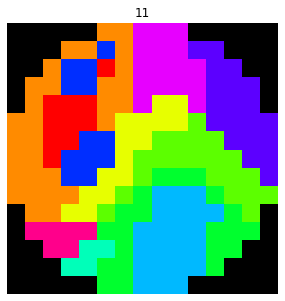

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


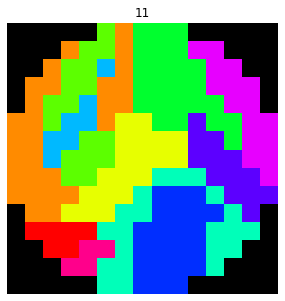

In [13]:
for i in [25,50,100]:
    pca = PCA(n_components=i)
    X_red = pca.fit_transform(dataGrid.get_data_array())
    D_PCA = Agglo_cluster(X_red,metric = 'Manhattan')

(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


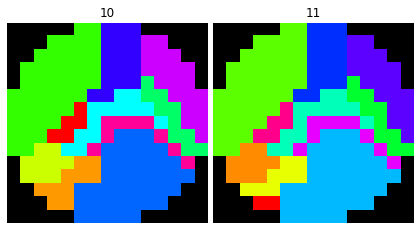

[array([5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 5,
        5, 5, 5, 1, 1, 1, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 0, 0,
        5, 5, 5, 5, 5, 5, 8, 2, 2, 1, 1, 4, 4, 8, 5, 5, 5, 5, 5, 8, 3, 3,
        2, 2, 2, 9, 9, 4, 4, 8, 5, 5, 5, 8, 3, 3, 7, 2, 2, 2, 2, 9, 9, 4,
        8, 8, 8, 8, 4, 3, 7, 7, 2, 2, 2, 2, 2, 9, 4, 4, 4, 4, 4, 3, 3, 7,
        7, 2, 2, 2, 2, 2, 2, 6, 6, 4, 4, 3, 3, 7, 7, 7, 2, 2, 2, 2, 2, 2,
        6, 6, 6, 3, 7, 7, 7, 2, 2, 2, 2, 2, 2, 6, 6, 6, 7, 7, 7, 7, 2, 2,
        2, 2, 2, 6, 6, 6, 7, 7, 7, 2, 2, 2, 2, 6, 6, 6, 7, 7, 2, 2, 6, 6,
        6], dtype=int64),
 array([ 5,  5,  5,  5,  5, 10, 10,  5,  5,  5,  5,  5,  5,  5,  1,  1,  1,
         5,  5,  5,  5,  5,  5,  5,  5,  0,  0,  0,  1,  1,  1,  5,  5,  5,
         5,  5,  5,  5,  0,  0,  0,  0,  1,  1,  5,  5,  5,  5,  5,  5,  8,
         2,  2,  0,  0,  4,  4,  8,  5,  5,  5,  5,  5,  8,  3,  3,  2,  2,
         2,  9,  9,  4,  4,  8,  5,  5,  5,  8,  3,  3,  7,  2,  2,  2,  2,
  

In [14]:
Agglo_cluster(dataGrid.get_data_array(),a=10, b=12, metric = 'Manhattan')

In [15]:
#Agglo_cluster(dataGrid.get_data_array(),'AveSim')

# Just some other stuff

In [16]:
# Cut down all the peaks to 20 peaks using peak_rem()
# peak_rem() was found to be inaccurate bcos each peak has 4 curves and that was not taken into account

X=peak_rem() 
X.keys()

20


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177])

In [17]:
np.shape( X[1])

(20, 9)

# Just Testing out stuffs here

In [18]:
X_data = pd.read_csv('C:/Users/oluwa/Jupyter notebooks/TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D_extr_param.csv',header=None)

In [19]:
X_data = np.array(X_data[X_data.columns[0:8]])

In [20]:
np.shape(X_data)

(88, 8)

In [21]:
#This should not work anymore because the Agglo_cluster code has been modified
#D_peakrem = Agglo_cluster(X_data)

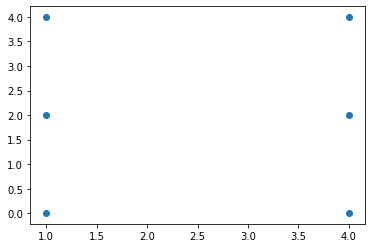

In [22]:
plt.scatter([1,1,1,4,4,4],[2,4,0,2,4,0])

In [23]:
dataGrid.x_axis = dataGrid.data[dataGrid.grid_locations[0]][:,0]
rang=[10,60]
#the right most, left most, bottom most, and top most grid
#locations in the rows and columns respectively.
row_sums = [5, 14, 25, 38, 51, 66, 81, 96, 111, 126, 139, 152, 163, 172, 177]
base_vals = [52,26,15,6,7,1,2,3,4,5,13,14,25,38,66]
top_vals = [112,140,153,164,165,173,174,175,176,177,171,172,163,152,126]
#lengths of each row
row_lengths = [5,9,11,13,13,15,15,15,15,15,13,13,11,9,5]

In [24]:
row_starts = [1] + [x + 1 for x in row_sums[:-1]]

In [25]:
row_starts
rang[0] = 4
for i,v in enumerate(row_starts):
    print(i,v)

0 1
1 6
2 15
3 26
4 39
5 52
6 67
7 82
8 97
9 112
10 127
11 140
12 153
13 164
14 173


In [26]:
mem = [0,3,6,99,6]
next(i for i,v in enumerate(mem) if  v>= rang[0])

2

In [27]:
(11+13)/2

12.0

In [28]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
AgglomerativeClustering().fit_predict(X)

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [29]:
i=4
hues=[float(float(x)/float(i)) for x in range(1,i+1)]
hues

[0.25, 0.5, 0.75, 1.0]

In [30]:
matplotlib.colors.hsv_to_rgb([hues[2],1,1])

array([0.5, 0. , 1. ])

In [31]:
'''def get_cluster_grids(i):
        agg = AgglomerativeClustering(n_clusters=i,affinity='precomputed',linkage='complete')
        D = D_peakrem
        return agg.fit_predict(D)
    '''

"def get_cluster_grids(i):\n        agg = AgglomerativeClustering(n_clusters=i,affinity='precomputed',linkage='complete')\n        D = D_peakrem\n        return agg.fit_predict(D)\n    "

In [32]:
#pp = get_cluster_grids(2)

In [33]:
#np.shape(pp)

In [34]:
#agg = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
#agg.fit_predict(D_peakrem)

In [35]:
np.linalg.norm([3,4,5,6])

9.273618495495704

In [36]:
np.sqrt((np.sum(np.square([2,3,4]))))

5.385164807134504

In [37]:
import numpy as np
X = np.array([[1, 1,1], [2, 1,2], [3, 1.2,3], [4, 1,4], [5, 0.8,5], [6, 1,5]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_
X_new = np.array([[1, 0,1], [1, 6.1,1], [1,1, 0], [0,1, 4], [3.2,2, 1], [0,9, 4]])
W_new = model.transform(X_new)

In [38]:
X

array([[1. , 1. , 1. ],
       [2. , 1. , 2. ],
       [3. , 1.2, 3. ],
       [4. , 1. , 4. ],
       [5. , 0.8, 5. ],
       [6. , 1. , 5. ]])

In [39]:
W

array([[0.        , 0.44269146],
       [0.60615371, 0.38601452],
       [1.09187713, 0.42874317],
       [1.82112933, 0.27110033],
       [2.55038153, 0.1134575 ],
       [2.83892911, 0.11181696]])

In [40]:
W.dot(H)

array([[0.93244768, 0.97842593, 1.0780102 ],
       [1.99047298, 0.99762098, 2.01039969],
       [3.02395164, 1.20781841, 2.97218699],
       [4.10841987, 1.03319841, 3.87609089],
       [5.19288808, 0.85857842, 4.7799948 ],
       [5.74991304, 0.92372038, 5.28554521]])

In [41]:
H

array([[1.94241952, 0.23832411, 1.76589709],
       [2.10631506, 2.21017578, 2.43512765]])

In [42]:
W

array([[0.        , 0.44269146],
       [0.60615371, 0.38601452],
       [1.09187713, 0.42874317],
       [1.82112933, 0.27110033],
       [2.55038153, 0.1134575 ],
       [2.83892911, 0.11181696]])

In [43]:
W.dot(H)

array([[0.93244768, 0.97842593, 1.0780102 ],
       [1.99047298, 0.99762098, 2.01039969],
       [3.02395164, 1.20781841, 2.97218699],
       [4.10841987, 1.03319841, 3.87609089],
       [5.19288808, 0.85857842, 4.7799948 ],
       [5.74991304, 0.92372038, 5.28554521]])

In [44]:
W

array([[0.        , 0.44269146],
       [0.60615371, 0.38601452],
       [1.09187713, 0.42874317],
       [1.82112933, 0.27110033],
       [2.55038153, 0.1134575 ],
       [2.83892911, 0.11181696]])

In [45]:
W_new

array([[0.53371015, 0.        ],
       [0.        , 1.18177012],
       [0.        , 0.2830247 ],
       [0.1814891 , 0.67745874],
       [0.2937143 , 0.71969428],
       [0.        , 1.9429241 ]])

# Tried n_clusters=None, compute_full_tree = True from Agglo cluster

Was useless after all

In [46]:
def similarity(X,d1,d2,metric=None):
    a = X[d1-1]
    b = X[d2-1]
    #a = np.log(a+100)
    #b = np.log(b+100)
    #a = dataGrid.data[d1][:,1]
    #b = dataGrid.data[d2][:,1]

    if metric == 'cosine':
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        return 1 - (dot_product / (norm_a * norm_b))
        #return np.abs((dot_product / (norm_a * norm_b)))
    if metric == 'Euclidean':
        return np.sqrt(np.sum(np.square(a-b)))
    if metric == 'sEuclidean':
        return np.sum(np.square(a-b))
    if metric == 'Manhattan':
        return np.sum(np.abs(a-b))
    if metric == 'None':
        return np.mean(np.abs(a-b))

In [47]:
X=dataGrid.get_data_array()
size = len(X)
   # K_Matrix = np.zeros(shape=(size,size))
    #for x in range(1,size+1):
     #   K_Matrix[x-1,x-1] = 1
      #  for N in dataGrid.neighbors(x).values():
       #     K_Matrix[x-1,N-1] = 1
        #    for N2 in dataGrid.neighbors(N).values():
         #       K_Matrix[x-1,N2-1] = 1

D = np.ones(shape=(size,size))
for x in range(size):
    for y in range(size):
        D[x,y] = similarity(X,x+1,y+1,'cosine')


(177, 800)


In [48]:
def get_cluster_grids(b):
        agg = AgglomerativeClustering(n_clusters=None,compute_full_tree = True, affinity='precomputed',linkage='complete', distance_threshold=20)
        agg.fit(D)
        labels=agg.labels_
        i = max(labels)+1
        
        #This part of the code is a savior
        new_labels=[None]*177
        for ii in range(0,177):
            x,y=dataGrid.coord(ii+1)
            new_grid=dataGrid.grid_num(16-x,y)
            new_labels[new_grid-1]=labels[ii]
            
        #print(labels)
        
            
        hues = [float(float(x)/float(i)) for x in range(1,i+1)]
        print(len(hues))
        cluster_grid = np.zeros(shape = (15,15,3))
        for val in range(1,178):
            x,y = dataGrid.coord(val)
            cluster = new_labels[val-1]
            #print(cluster)
            cluster_grid[15-y][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
            #cluster_grid[y-1][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
            
        return cluster_grid, new_labels

1


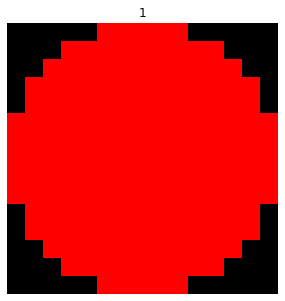

In [49]:
fig = plt.figure()
fig.tight_layout()
Big_labels = []
cg,labels = get_cluster_grids(10)
end=max(labels)+1
start = max(labels)
for i in range(start,end):
    #cg,labels = get_cluster_grids(i)
    Big_labels.append(labels)
    ax = fig.add_subplot(1,end-start,i-start+1)
    ax.imshow(cg)
    #ax.invert_yaxis()
    ax.title.set_text(i+1)
    ax.axis("off")

k=.03
plt.subplots_adjust(left=k,right=(1-k),bottom=k,top=(1-k),wspace=k,hspace=k)
#plt.savefig("/home/sasha/Desktop/Peak_Clustering_Images/clust-" + str(delta) + "-" + str(C) + ".png")
plt.show()